# **Objective**


This Python notebook is to help a running shoe company figure out their marketing and product strategies. We'll do this by using unsupervised learning, specifically clustering techniques, to analyze survey data and see if we can spot different groups of runners.

# Team Members



*   Solo


# Data Preparation

**Data Dictionary**



*  'record' -Unique identifier for each survey response

*  'id' - Unique ID for each respondent

*   'S1r1, S1r2, S1r3' - Responses to the question about country

*   'S2r1, S2r2' - Responses to the question about verification status
*   'S3r1, S3r2' - Responses to the question about gender


*   'S4r1, S4r2, S4r3, ...' - Responses to the question about age


*   'Q1r1, Q1r2, Q1r3, ...' - Responses to the question about running frequency


*   'Q2r1, Q2r2, ...' - Responses to the question about the number of running shoes owned


*   'Q3r1, Q3r2, ...' - Responses to the question about cushioning type in training shoes
*   'Q4r1, Q4r2, ...' - Responses to the question about plating type in racing shoes
*   'Q5r1, Q5r2, Q5r3, ...'- Responses to the question about top complaint about running shoes

*   'Q6r1, Q6r2, Q6r3, ...'- Responses to the question about other physical activities


*  'Q7r1, Q7r2, Q7r3,Q7r4,Q7r5' - Responses to the question about preferred shoe colors








Importing libraries

In [82]:

#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans

#Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

Loading Dataset

In [83]:
#upload the excel file
from google.colab import files
data = files.upload()


Saving survey_data.xlsx to survey_data (3).xlsx


In [84]:
data=pd.read_excel("survey_data.xlsx") #open and run the excel file

**Data Pre-Processing**

In [85]:
# display the top 5 rows
data.head()


,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,9731743,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
1,2,5917428,0,0,1,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,2459391,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,4,3277896,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,5,4986375,1,0,0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0


In [86]:
data.dtypes #to make sure all the dtypes are in number format

record    int64
id        int64
S1r1      int64
S1r2      int64
S1r3      int64
S2r1      int64
S2r2      int64
S3r1      int64
S3r2      int64
S4r1      int64
S4r2      int64
S4r3      int64
S4r4      int64
S4r5      int64
S4r6      int64
Q1r1      int64
Q1r2      int64
Q1r3      int64
Q2r1      int64
Q2r2      int64
Q2r3      int64
Q2r4      int64
Q3r1      int64
Q3r2      int64
Q3r3      int64
Q3r4      int64
Q4r1      int64
Q4r2      int64
Q4r3      int64
Q4r4      int64
Q4r5      int64
Q5r1      int64
Q5r2      int64
Q5r3      int64
Q5r4      int64
Q5r5      int64
Q5r6      int64
Q6r1      int64
Q6r2      int64
Q6r3      int64
Q6r4      int64
Q6r5      int64
Q7r1      int64
Q7r2      int64
Q7r3      int64
Q7r4      int64
Q7r5      int64
dtype: object

In [87]:
data.isnull().sum() #null values checked

record    0
id        0
S1r1      0
S1r2      0
S1r3      0
S2r1      0
S2r2      0
S3r1      0
S3r2      0
S4r1      0
S4r2      0
S4r3      0
S4r4      0
S4r5      0
S4r6      0
Q1r1      0
Q1r2      0
Q1r3      0
Q2r1      0
Q2r2      0
Q2r3      0
Q2r4      0
Q3r1      0
Q3r2      0
Q3r3      0
Q3r4      0
Q4r1      0
Q4r2      0
Q4r3      0
Q4r4      0
Q4r5      0
Q5r1      0
Q5r2      0
Q5r3      0
Q5r4      0
Q5r5      0
Q5r6      0
Q6r1      0
Q6r2      0
Q6r3      0
Q6r4      0
Q6r5      0
Q7r1      0
Q7r2      0
Q7r3      0
Q7r4      0
Q7r5      0
dtype: int64

In [88]:
data.duplicated().sum() #check duplicates

0

**Exploratory Data Analysis**

In [89]:
#decoding the S1
def represented_country(row):
    if row['S1r1'] == 1:
        return 'United States'
    elif row['S1r2'] == 1:
        return 'United Kingdom'
    elif row['S1r3'] == 1:
        return 'Japan'
    else:
        return 'Others'


In [90]:
data['Country'] = data.apply(represented_country, axis=1) #apply the condition to the country column


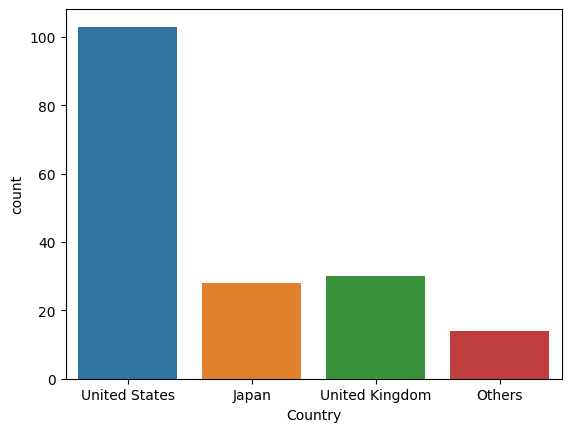

In [91]:
sns.countplot(data = data,x = 'Country') # Visualization for Country Distribution
plt.show()


**`observations`** :- The majority of the people who filled the survey are from united states followed by United kingdom , japan and others. here others are the people who are from other countries or they haven't filled the response.

In [92]:
# decoding the s2
def Verification(row):
    if row['S2r1'] == 1:
        return 'Valid'
    elif row['S2r2'] == 1:
        return 'Invalid'
    else:
        return 'Unknown'

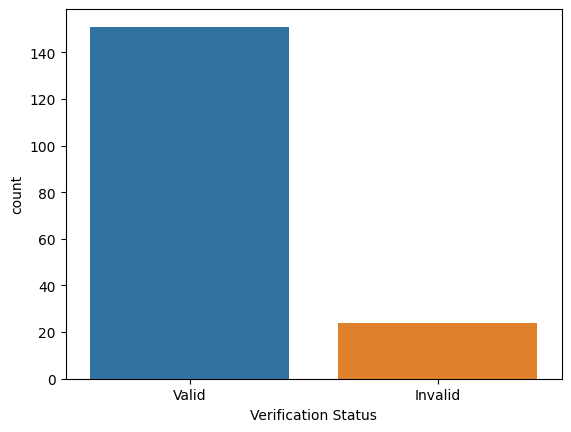

In [93]:
data['Verification Status'] = data.apply(Verification, axis=1) # created a new column
sns.countplot(data = data,x = 'Verification Status') # to see the number of people how many are valid and invalid
plt.show()

**observations** :- more than 150 people were valid to fill this survey and around 20 are invalid to fill this survey. we have an option to remove these invalid people but since it's a small percentage, I am not removing.

In [94]:
# deocding the s3
def Gender(row):
    if row['S3r1'] == 1:
        return 'Male'
    elif row['S3r2'] == 1:
        return 'Female'
    else:
        return 'Others'

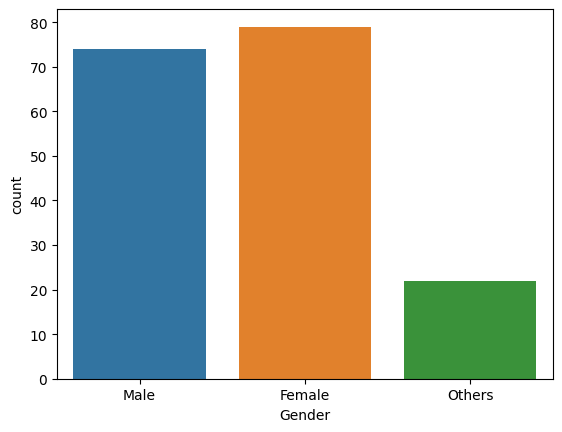

In [95]:
data['Gender'] = data.apply(Gender, axis=1) #created the column with gender name
sns.countplot(data = data,x = 'Gender') # display the plot to see the number of male and female
plt.show()


**Observations** :- females have responded to survey more than males but it is not a much difference and there is an other category which can be people from other gender or who haven't responded to this question

In [96]:
# decoding the age column
def Age(row):
    if row['S4r1'] == 1:
        return 'Under 18'
    elif row['S4r2'] == 1:
        return '18-24'
    elif row['S4r3'] == 1:
        return '25-34'
    elif row['S4r4'] == 1:
        return '35-44'
    elif row['S4r5'] == 1:
        return '45-54'
    elif row['S4r6'] == 1:
        return 'Above 55'
    else:
        return 'Others'

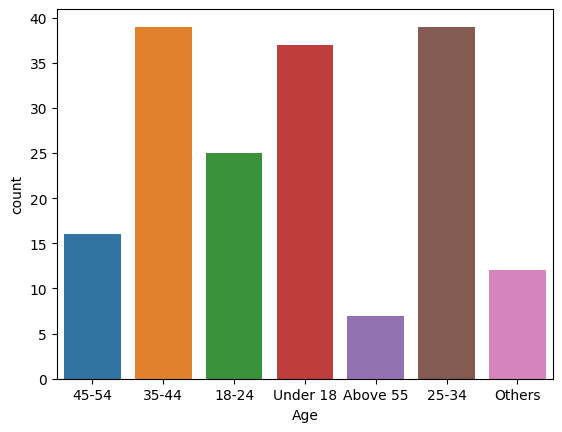

In [97]:
data['Age'] = data.apply(Age, axis=1) # added an age column
sns.countplot(data = data,x = 'Age') # displays the chart about the age category of people

plt.show()


Observations :- people who are in age of 25-44 have filled the survey more followed by the people who are under 18.

In [98]:
#q1=How regularly do you go for a run?
# decoding Q1
def Q1(row):
    if row['Q1r1'] == 1:
        return 'Occasionally when the weather is nice'
    elif row['Q1r2'] == 1:
        return 'Fairly regularly around 3-4 times a week'
    elif row['Q1r3'] == 1:
        return 'Generally 5+ times a week'

    else:
        return 'Others'


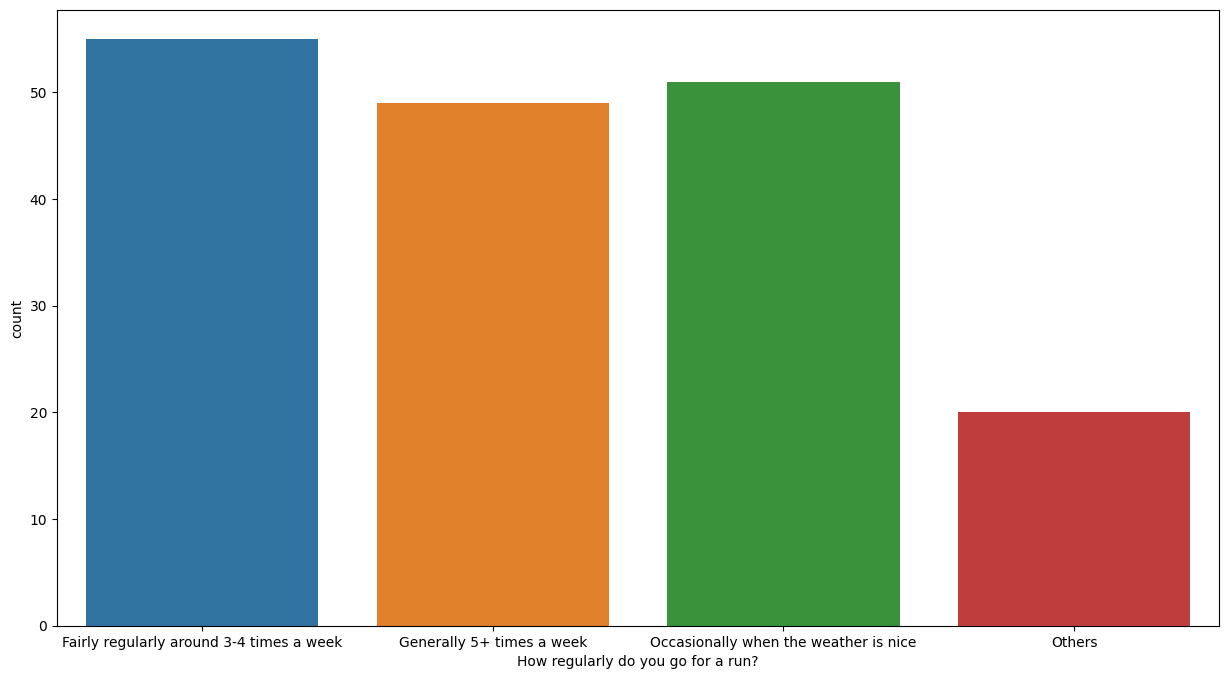

In [99]:
data['How regularly do you go for a run?'] = data.apply(Q1, axis=1)   # created a new column
plt.figure(figsize = (15,8))
sns.countplot(data = data,x = 'How regularly do you go for a run?') #displays the plot to know the number of people who responded to this question
plt.show()


**Observations** :- there is an equal response for this question, people who run 3-4 times in a week are little more. The other category can be people who will not go for a run or haven't responded.

In [100]:
#q2=How many pairs of running shoes do you own at a time when you train?
# decoding q2
def Q2(row):
    if row['Q2r1'] == 1:
        return ' single pair that I use to go running in and also use for other activities'
    elif row['Q2r2'] == 1:
        return '1 pair of running shoes that I only use to run in'
    elif row['Q2r3'] == 1:
        return '3+ pairs of running shoes, some that I use for training and others that I use to race.'
    elif row['Q2r4'] == 1:
        return '5+ pairs of running shoes depending on the type of training and racing that I am doing'

    else:
        return 'Others'

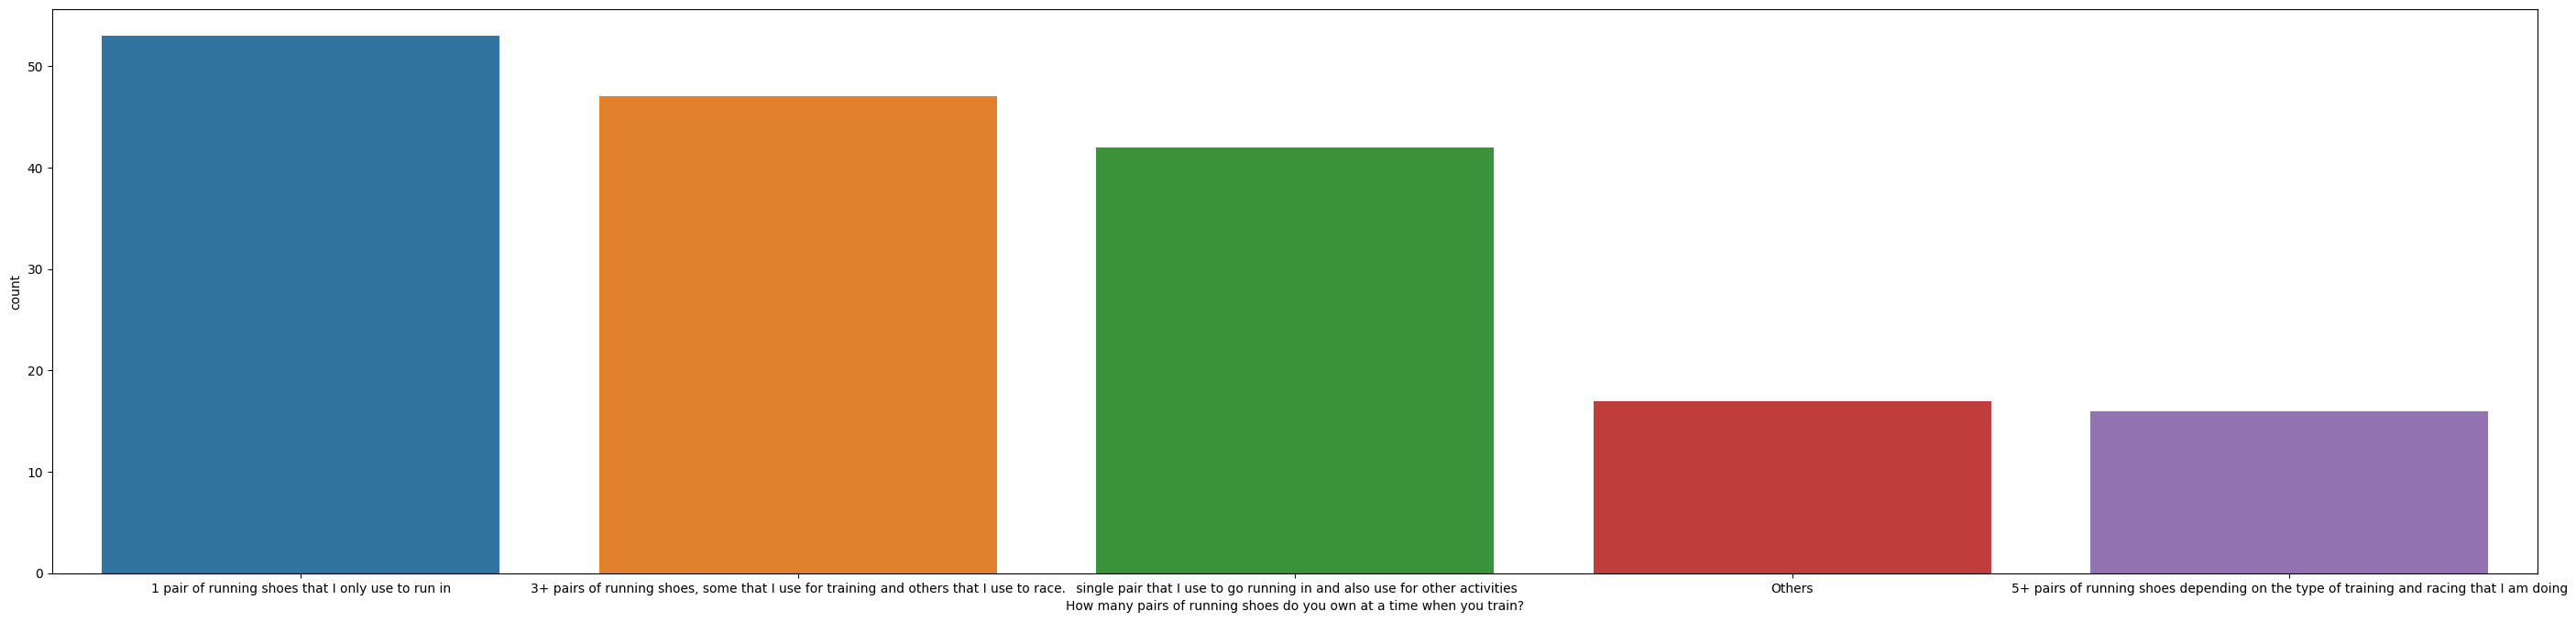

In [101]:
data['How many pairs of running shoes do you own at a time when you train?'] = data.apply(Q2, axis=1) #created a new column for q2
plt.figure(figsize = (35,8))
sns.countplot(data = data,x = 'How many pairs of running shoes do you own at a time when you train?')  #displays the plot to know the number of people who responded to this question


plt.show()

Observations :- Most of the people who filled this survey has 1 pair of running shoes that they only use to run followed by the people who owns 3+ pairs of running shoes.

In [103]:
#q3=What type of cushioning do the shoes that you train in most regularly use?
# decoding Q3
def Q3(row):
    if row['Q3r1'] == 1:
        return 'I am not sure'
    elif row['Q3r2'] == 1:
        return 'Foam'
    elif row['Q3r3'] == 1:
        return 'Rubber'
    elif row['Q3r4'] == 1:
        return 'blend of foam and rubber'
    else:
        return 'Others'

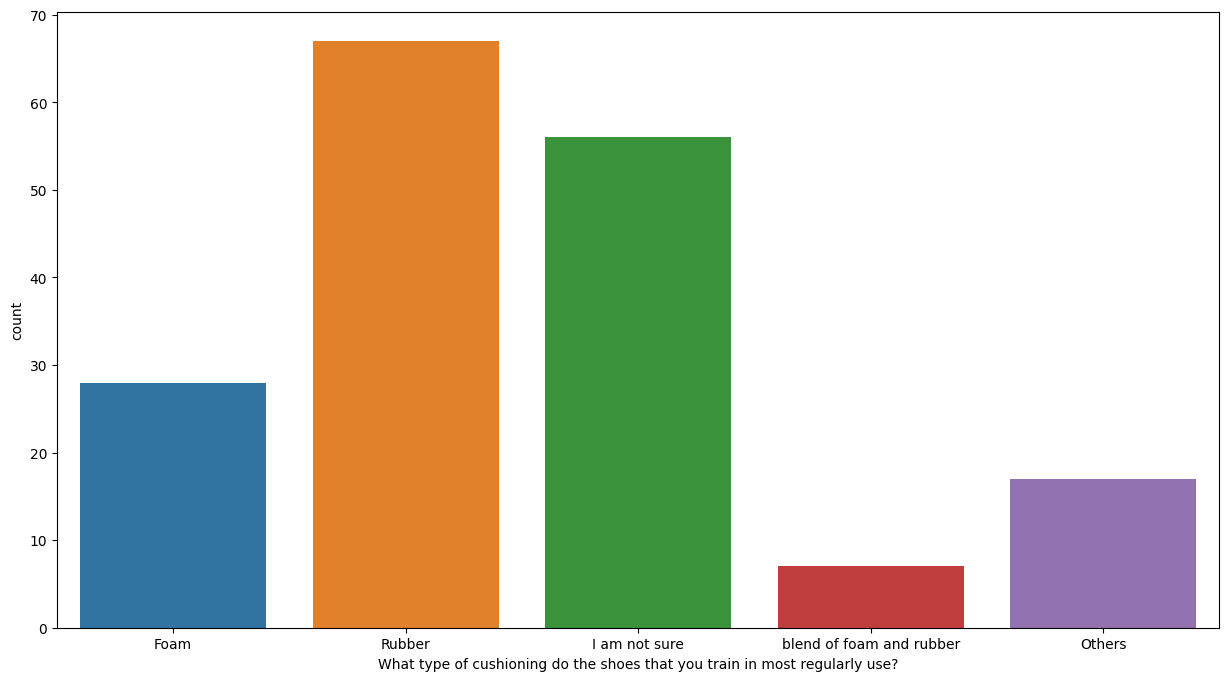

In [104]:
data['What type of cushioning do the shoes that you train in most regularly use?'] = data.apply(Q3, axis=1) # created a column for the q3
plt.figure(figsize = (15,8))
sns.countplot(data = data,x = 'What type of cushioning do the shoes that you train in most regularly use?') # displays the number of people based on their response for this question
plt.show()

Observations :- Most of the people in this survey use rubber as cushioning for their shoes to train and few or not sure about the cushioning.

In [105]:
#q4=What type of plating do the shoes that you race in use?
# Decoding Q4
def Q4(row):
    if row['Q4r1'] == 1:
        return 'I dont run races'
    elif row['Q4r2'] == 1:
        return 'I use the same shoes I train in to run races'
    elif row['Q4r3'] == 1:
        return 'Rubber'
    elif row['Q4r4'] == 1:
        return 'Foam'
    elif row['Q4r5'] == 1:
      return 'Carbon Plate'
    else:
        return 'Others'

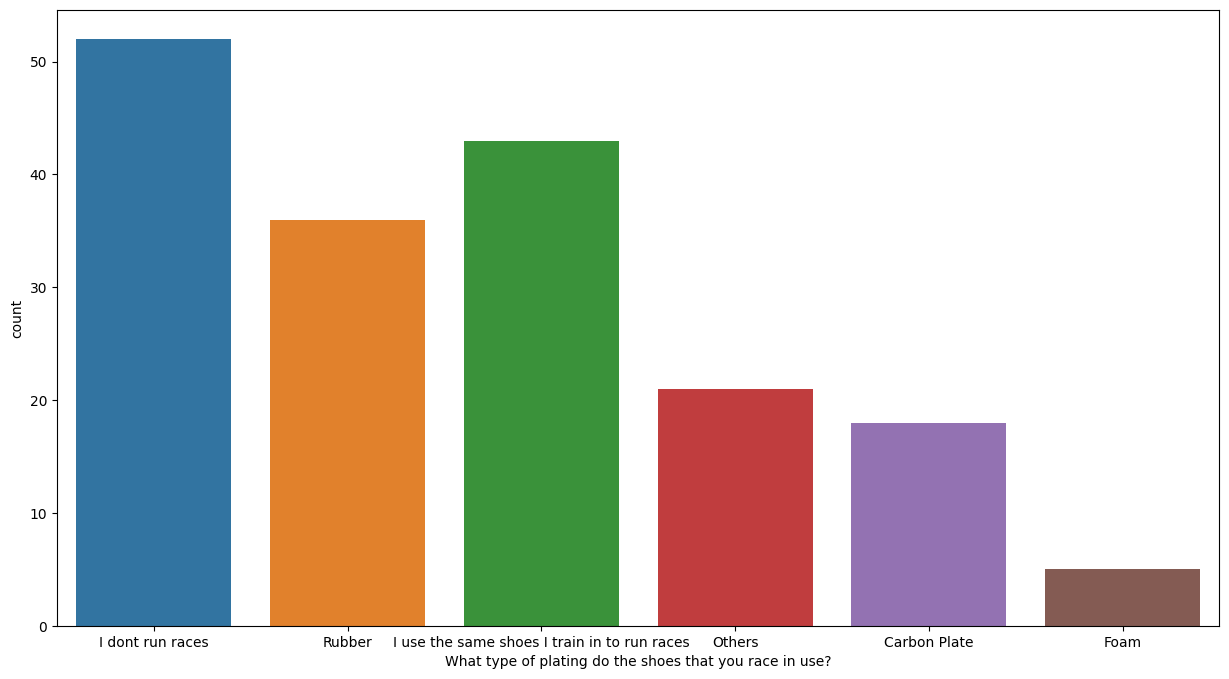

In [106]:
data['What type of plating do the shoes that you race in use?'] = data.apply(Q4, axis=1) #created the column
plt.figure(figsize = (15,8))
sns.countplot(data = data,x = 'What type of plating do the shoes that you race in use?')


plt.show()

observations:- The people who responded to this survey for this question mostly don't go for running shoes or marathons. but people who go for races use the same shoes that they use in training followed by rubber plating.

In [107]:

#q5=What physical activities do you do outside of running?
# decoding Q5
def Q5(row):
    if row['Q5r1'] == 1:
        return 'Activities like yoga and pilates'
    elif row['Q5r2'] == 1:
        return 'Nothing outside of running'
    elif row['Q5r3'] == 1:
        return 'Spinning'
    elif row['Q5r4'] == 1:
        return 'Strength Conditioning like lifting'
    elif row['Q5r5'] == 1:
      return 'Swimming'
    elif row['Q5r6'] == 1:
      return 'Hiking'
    else:
        return 'Others'

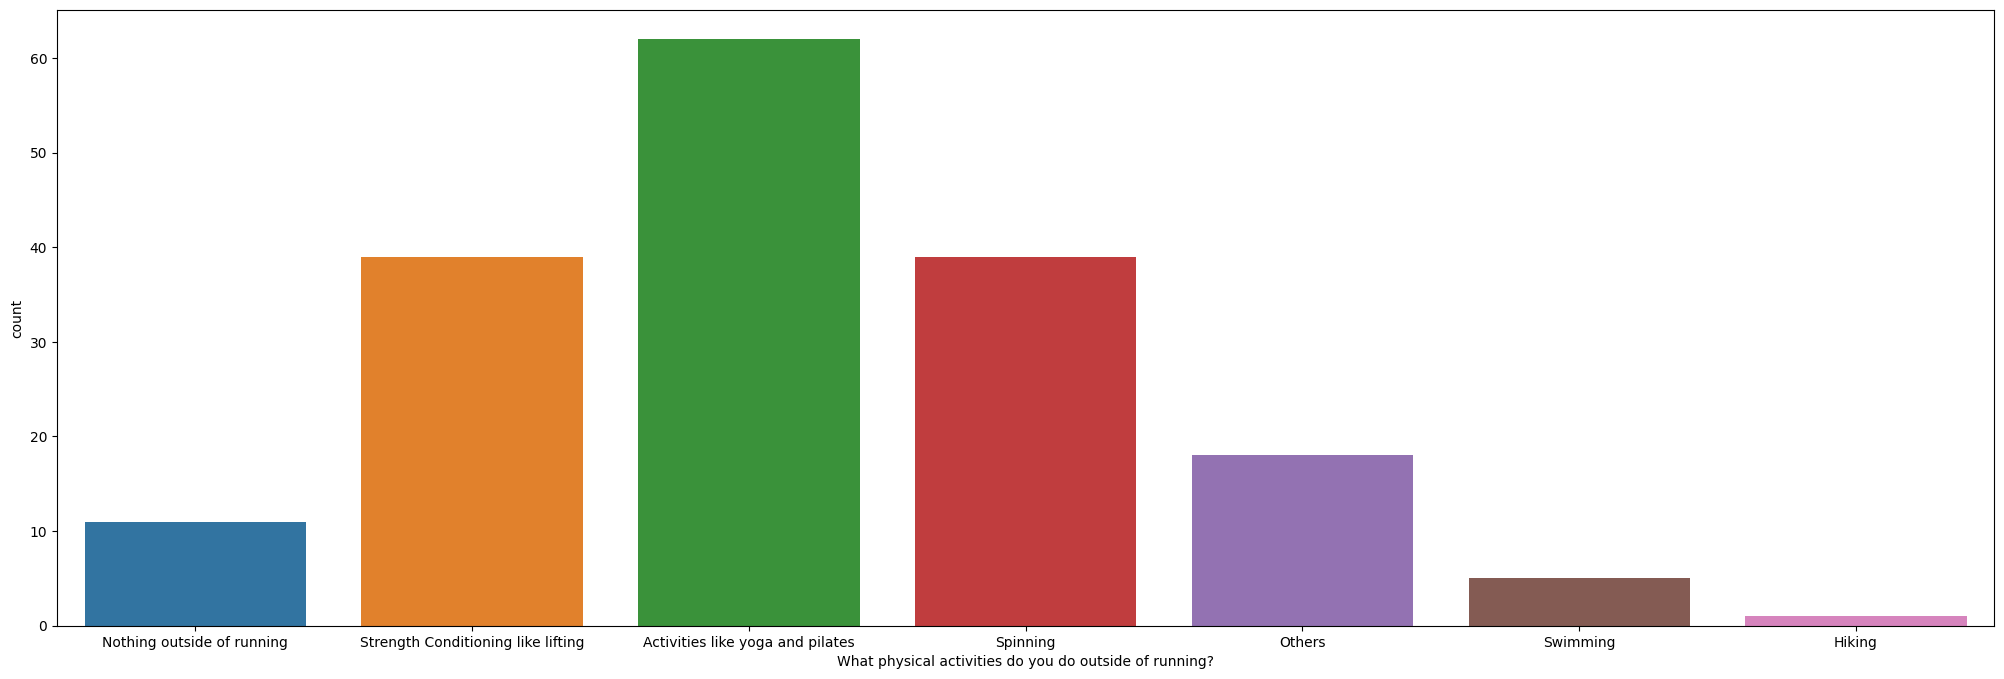

In [108]:
data['What physical activities do you do outside of running?'] = data.apply(Q5, axis=1) # created a new column
plt.figure(figsize = (25,8))
sns.countplot(data = data,x = 'What physical activities do you do outside of running?')


plt.show()

Observations :- people who filled this survey do activies like yoga and pilates more than other activies.There are equal number of people who do strength conditioning and spinning activities.

In [109]:
#q6=What is your top complaint about the shoe you use to run in most regularly?
# Decoding the Q6
def Q6(row):
    if row['Q6r1'] == 1:
        return 'I have no complaints!'
    elif row['Q6r2'] == 1:
        return 'They wear out too fast and Iam always having to buy new ones.'
    elif row['Q6r3'] == 1:
        return 'They feel too narrow for my feet'
    elif row['Q6r4'] == 1:
        return 'They are too heavy.'
    elif row['Q6r5'] == 1:
      return 'They feel great but dont feel fashionable.'

    else:
        return 'Others'

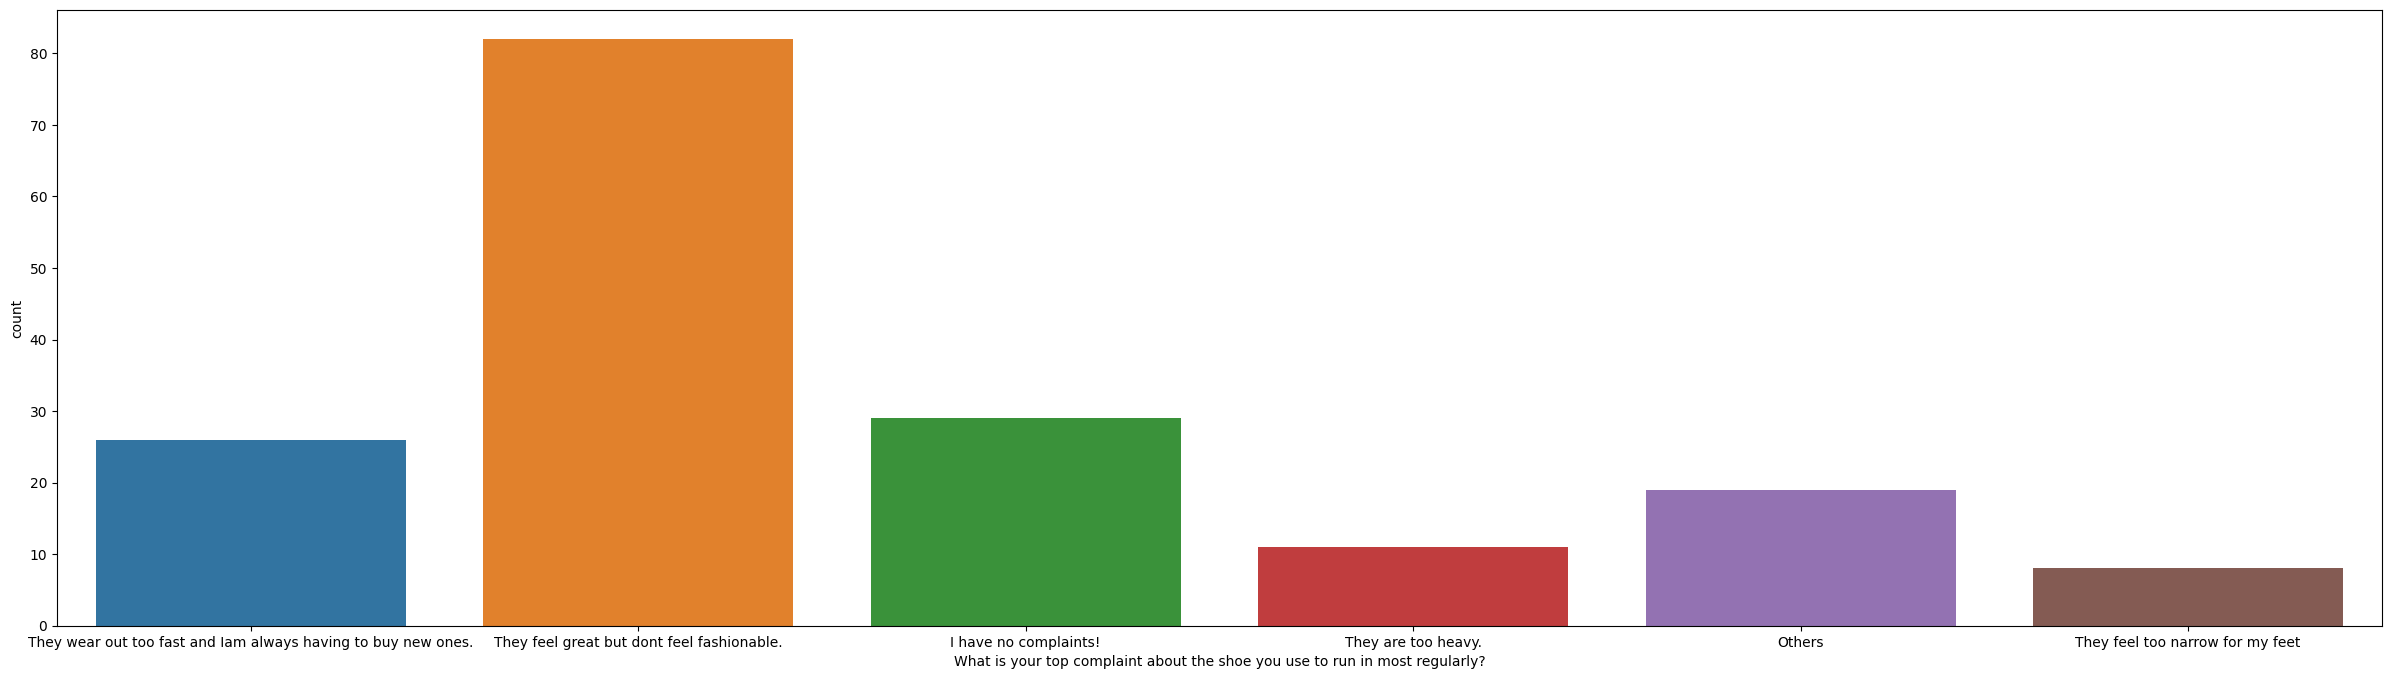

In [110]:
data['What is your top complaint about the shoe you use to run in most regularly?'] = data.apply(Q6, axis=1) #created a new column
plt.figure(figsize = (30,8))
sns.countplot(data = data,x = 'What is your top complaint about the shoe you use to run in most regularly?') # display the number of people for this question


plt.show()

Observations :- The top complaint about their running shoes is that they don't feel fashionable and there are good number of people who has no complaints, which is a good sign.

In [111]:
#q7-What colors do you prefer for the shoes you run in most often?
def Q7(row):
    if row['Q7r1'] == 1:
        return 'Anything bright & bold'
    elif row['Q7r2'] == 1:
        return 'Soft pastels - pink, coral, purple'
    elif row['Q7r3'] == 1:
        return 'Earth tones - greens, yellows, browns'
    elif row['Q7r4'] == 1:
        return 'Neutrals - black & white.'
    elif row['Q7r5'] == 1:
      return 'Something normal, no strong preference.'

    else:
        return 'Others'

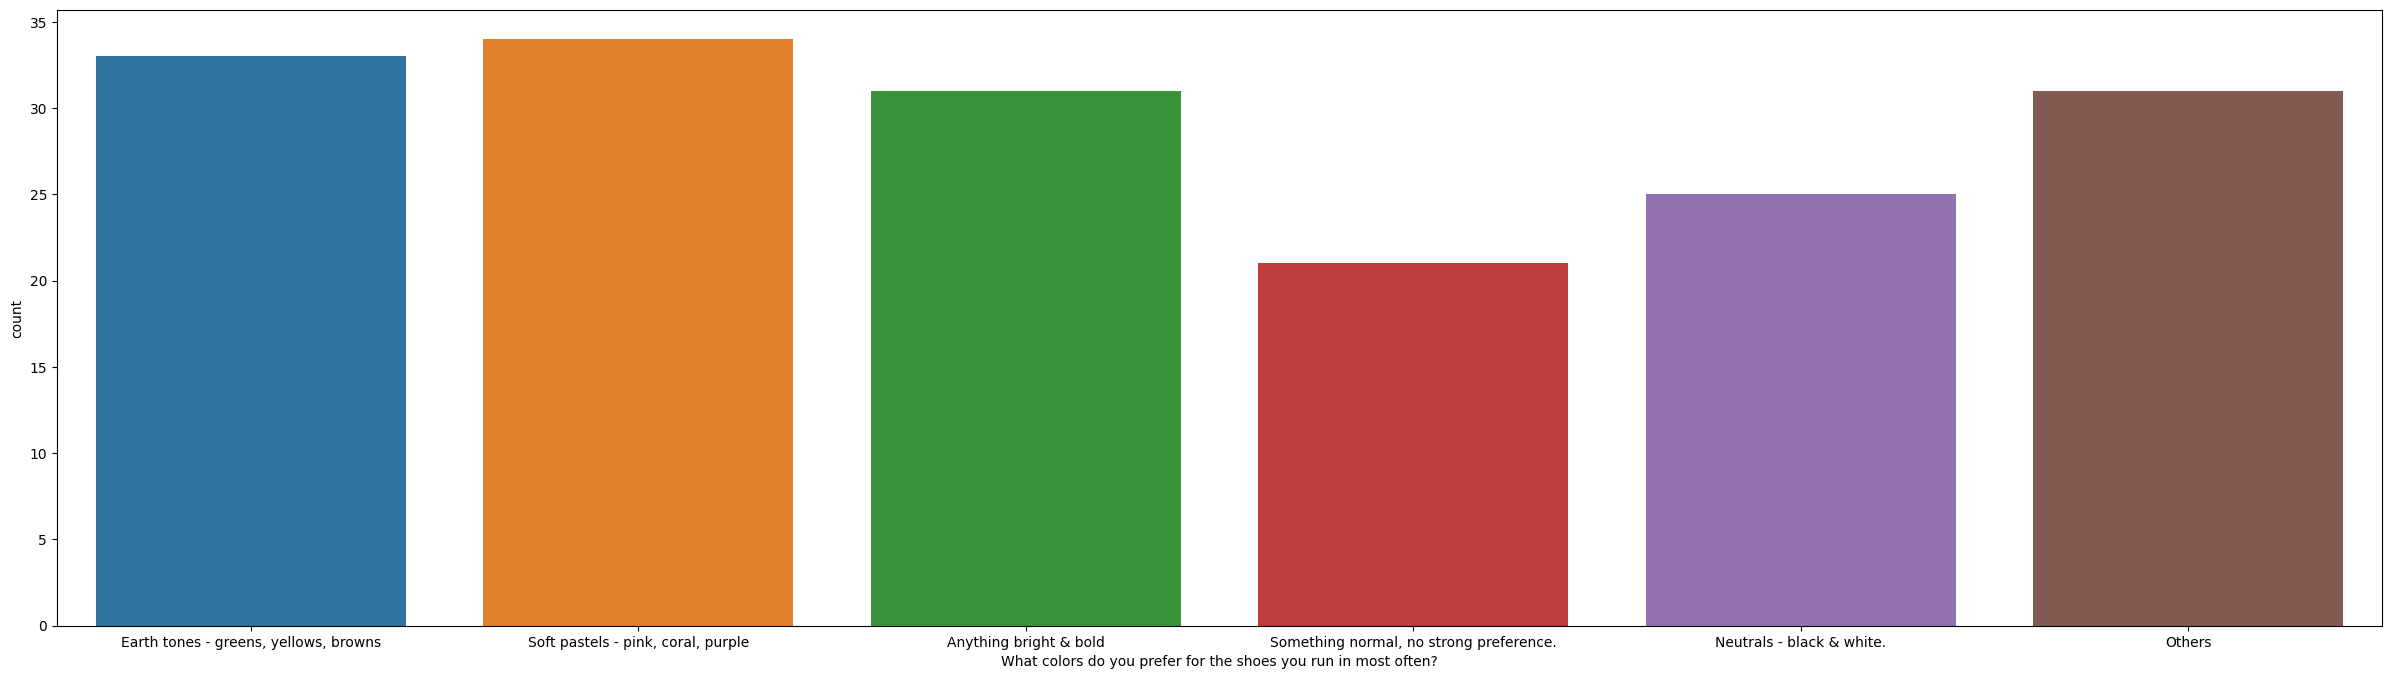

In [112]:
data['What colors do you prefer for the shoes you run in most often?'] = data.apply(Q7, axis=1) # create a new column in data
plt.figure(figsize = (30,8))
sns.countplot(data = data,x = 'What colors do you prefer for the shoes you run in most often?') # display the number of people for this question
plt.show()

Observations :- The people who filled this survey  prefer soft pastels colours followed by earth tones and there is a good number of people in others who prefer other colors or they haven't responded to this question.

In [113]:
data.head() # to check are the new columns are added or not

,record,id,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,...,Verification Status,Gender,Age,How regularly do you go for a run?,How many pairs of running shoes do you own at a time when you train?,What type of cushioning do the shoes that you train in most regularly use?,What type of plating do the shoes that you race in use?,What physical activities do you do outside of running?,What is your top complaint about the shoe you use to run in most regularly?,What colors do you prefer for the shoes you run in most often?
0,1,9731743,1,0,0,1,0,1,0,0,...,Valid,Male,45-54,Fairly regularly around 3-4 times a week,1 pair of running shoes that I only use to run in,Foam,I dont run races,Nothing outside of running,They wear out too fast and Iam always having t...,"Earth tones - greens, yellows, browns"
1,2,5917428,0,0,1,1,0,1,0,0,...,Valid,Male,35-44,Fairly regularly around 3-4 times a week,1 pair of running shoes that I only use to run in,Rubber,Rubber,Strength Conditioning like lifting,They wear out too fast and Iam always having t...,"Earth tones - greens, yellows, browns"
2,3,2459391,0,0,1,1,0,0,1,0,...,Valid,Female,18-24,Generally 5+ times a week,"3+ pairs of running shoes, some that I use for...",Rubber,Rubber,Strength Conditioning like lifting,They feel great but dont feel fashionable.,"Soft pastels - pink, coral, purple"
3,4,3277896,0,0,1,1,0,0,1,0,...,Valid,Female,35-44,Fairly regularly around 3-4 times a week,1 pair of running shoes that I only use to run in,Rubber,I use the same shoes I train in to run races,Activities like yoga and pilates,They feel great but dont feel fashionable.,"Soft pastels - pink, coral, purple"
4,5,4986375,1,0,0,1,0,0,1,1,...,Valid,Female,Under 18,Occasionally when the weather is nice,single pair that I use to go running in and a...,I am not sure,I use the same shoes I train in to run races,Activities like yoga and pilates,They feel great but dont feel fashionable.,Anything bright & bold


In [114]:
#lets drop the unwanted columns for clusttering like the id , record and new columns that were made

df = data.drop(columns=['Country','Verification Status','record', 'id','Gender','Age','How regularly do you go for a run?','How many pairs of running shoes do you own at a time when you train?','What type of cushioning do the shoes that you train in most regularly use?','What type of plating do the shoes that you race in use?','What type of plating do the shoes that you race in use?','What is your top complaint about the shoe you use to run in most regularly?','What physical activities do you do outside of running?','What colors do you prefer for the shoes you run in most often?'])

In [115]:
df.head() # cross -checking

,S1r1,S1r2,S1r3,S2r1,S2r2,S3r1,S3r2,S4r1,S4r2,S4r3,...,Q6r1,Q6r2,Q6r3,Q6r4,Q6r5,Q7r1,Q7r2,Q7r3,Q7r4,Q7r5
0,1,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
1,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,0,0


# Similarity Matrix

for Binary data we can use:-

1.   Binary Euclidean distance
2.   simple matching co-efficient
3.   Jaccard's index

I will be going ahead with Jaccard metric as its performs well with binary data and our data is completely binary response



In [116]:
from sklearn.metrics import pairwise_distances # importing the library

#Calculating the Jaccard similarity matrix
jaccard_matrix = 1 - pairwise_distances(df.to_numpy(), metric="jaccard") #here the df is converted to numpy array for caluclation

jaccard_similarity_df = pd.DataFrame(jaccard_matrix) # Converted the matrix bagain back to data frame to print the output
print(jaccard_similarity_df)

          0         1         2         3         4         5         6    \
0    1.000000  0.333333  0.083333  0.142857  0.090909  0.136364  0.142857   
1    0.333333  1.000000  0.333333  0.375000  0.047619  0.210526  0.222222   
2    0.083333  0.333333  1.000000  0.333333  0.142857  0.315789  0.200000   
3    0.142857  0.375000  0.333333  1.000000  0.294118  0.095238  0.692308   
4    0.090909  0.047619  0.142857  0.294118  1.000000  0.095238  0.375000   
..        ...       ...       ...       ...       ...       ...       ...   
170  0.142857  0.294118  0.600000  0.222222  0.222222  0.352941  0.157895   
171  0.090909  0.294118  0.600000  0.222222  0.157895  0.277778  0.222222   
172  0.130435  0.142857  0.368421  0.142857  0.142857  0.562500  0.090909   
173  0.142857  0.294118  0.600000  0.222222  0.222222  0.277778  0.157895   
174  0.040000  0.263158  0.733333  0.333333  0.142857  0.388889  0.200000   

          7         8         9    ...       165       166       167  \
0  

In [118]:
jaccard_distance_matrix = 1 - jaccard_matrix #Using the Jaccard distance = (1 - Jaccard similarity) for hierarchical clustering
print(jaccard_distance_matrix)

[[0.         0.66666667 0.91666667 ... 0.86956522 0.85714286 0.96      ]
 [0.66666667 0.         0.66666667 ... 0.85714286 0.70588235 0.73684211]
 [0.91666667 0.66666667 0.         ... 0.63157895 0.4        0.26666667]
 ...
 [0.86956522 0.85714286 0.63157895 ... 0.         0.66666667 0.55555556]
 [0.85714286 0.70588235 0.4        ... 0.66666667 0.         0.58823529]
 [0.96       0.73684211 0.26666667 ... 0.55555556 0.58823529 0.        ]]


# **Clustering**


*   hierarchical clustering - Agglomerative clustering

*   K-means clustering



*   K- Mode clustering



**Agglomerative clustering**

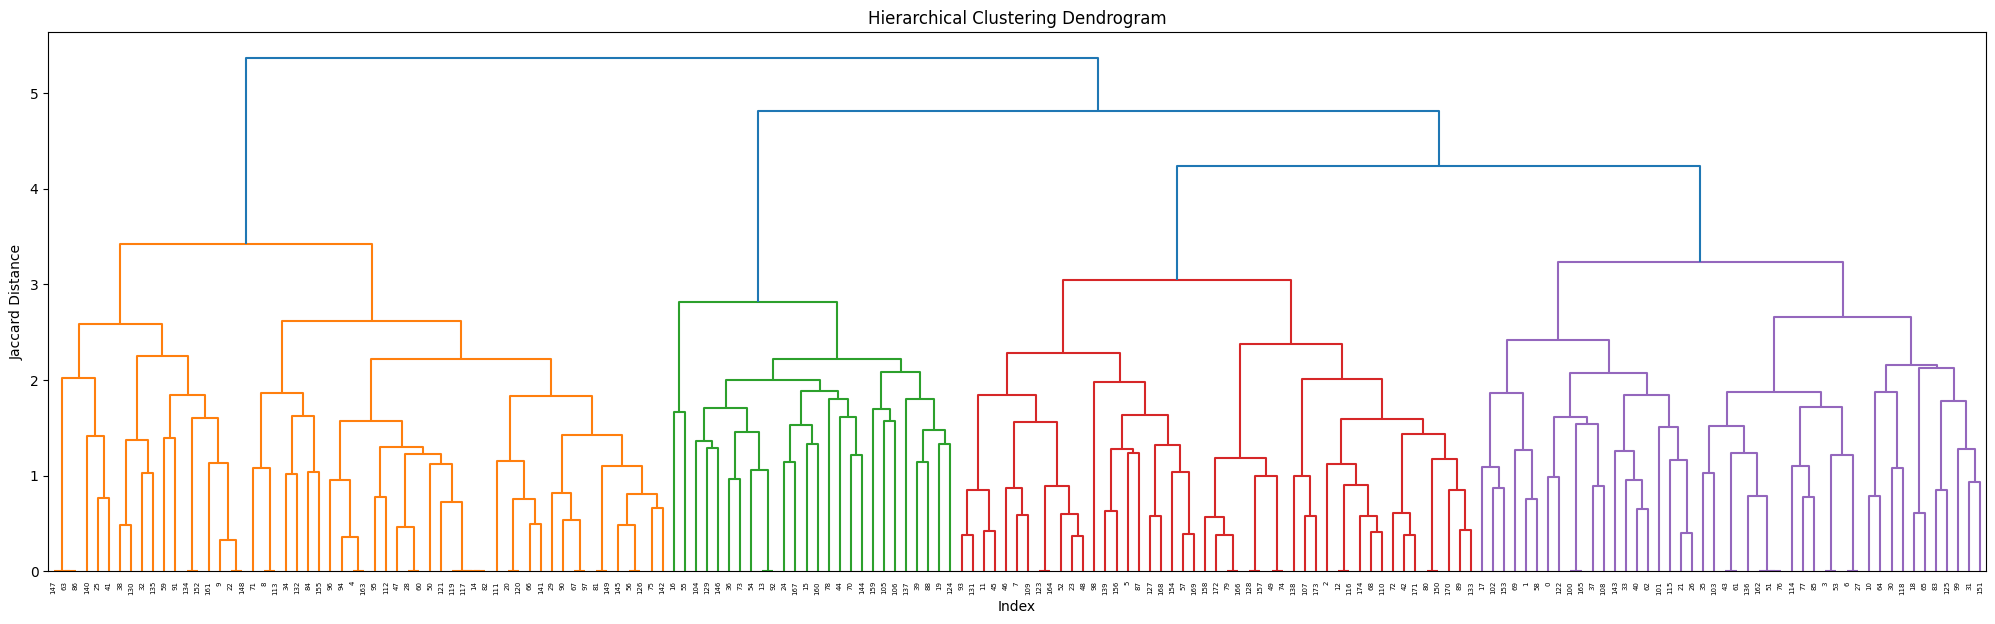

In [119]:
jaccard_distance_matrix = pairwise_distances(df.to_numpy(), metric="jaccard")
from scipy.cluster.hierarchy import dendrogram, linkage  # import the libraries
plt.figure(figsize=(25, 7))
tree_plot = dendrogram(linkage(jaccard_distance_matrix, method="complete")) # Plotting the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Jaccard Distance')
plt.show()


In [120]:
from sklearn.cluster import AgglomerativeClustering  # imported the library

Ag = AgglomerativeClustering(n_clusters=5, metric='precomputed', linkage='complete') # agglomerative clustering with 4-5 clusters based on dendrogram and change in hyperparameters based on jaccard's similarity

Ag_clusters = Ag.fit_predict(jaccard_distance_matrix)

In [121]:
from sklearn.metrics import silhouette_score  # doing evaluation using silhoutte_score

silhouette_score(jaccard_distance_matrix, Ag_clusters)

0.30969594878069656

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 100.01it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [4].
[clusteval] >INFO> Fin.


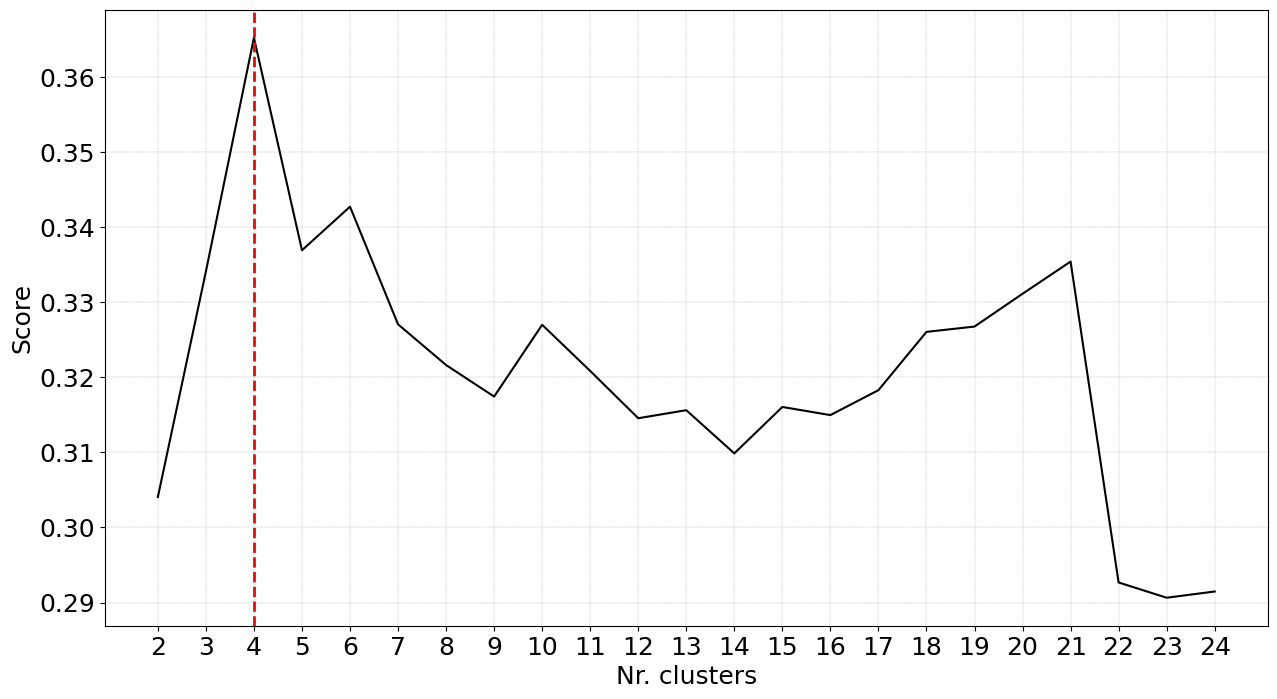

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [122]:
! pip install clusteval
from clusteval import clusteval # experiment to find the best silhoutte score by adding cluster evaluation library
import numpy as np

ce = clusteval(evaluate='silhouette')  #Silhouette cluster evaluation

ce.fit(jaccard_distance_matrix) ## Fit the model to the data

ce.plot()  #Plot the results



**K-mean**

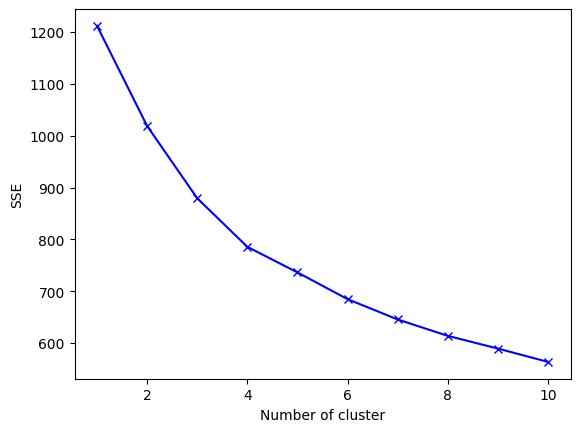

In [123]:
#Empty dictionary to store the SSE for each value of k
sse = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and
# store the inertia value for that k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    sse[k] = kmeans.inertia_

#Elbow plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Unable to find the cluster using this elbow curve. so lets go ahead with another method

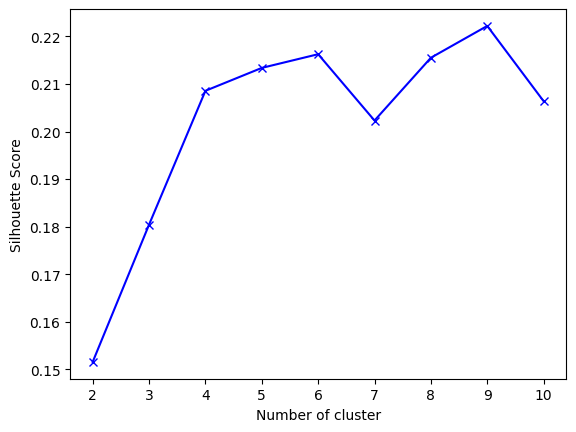

In [124]:
#Empty dictionary to store the Silhouette score for each value of k
sc = {}

# iterate for a range of Ks and fit the scaled data to the algorithm. Store the Silhouette score for that k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    labels = kmeans.predict(df)
    sc[k] = silhouette_score(df, labels)

#Elbow plot
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.show()

The best silhoutte score is 0.26 in k-means with 9 clusters

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|██████████| 23/23 [00:00<00:00, 74.03it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [24].
[clusteval] >INFO> Fin.


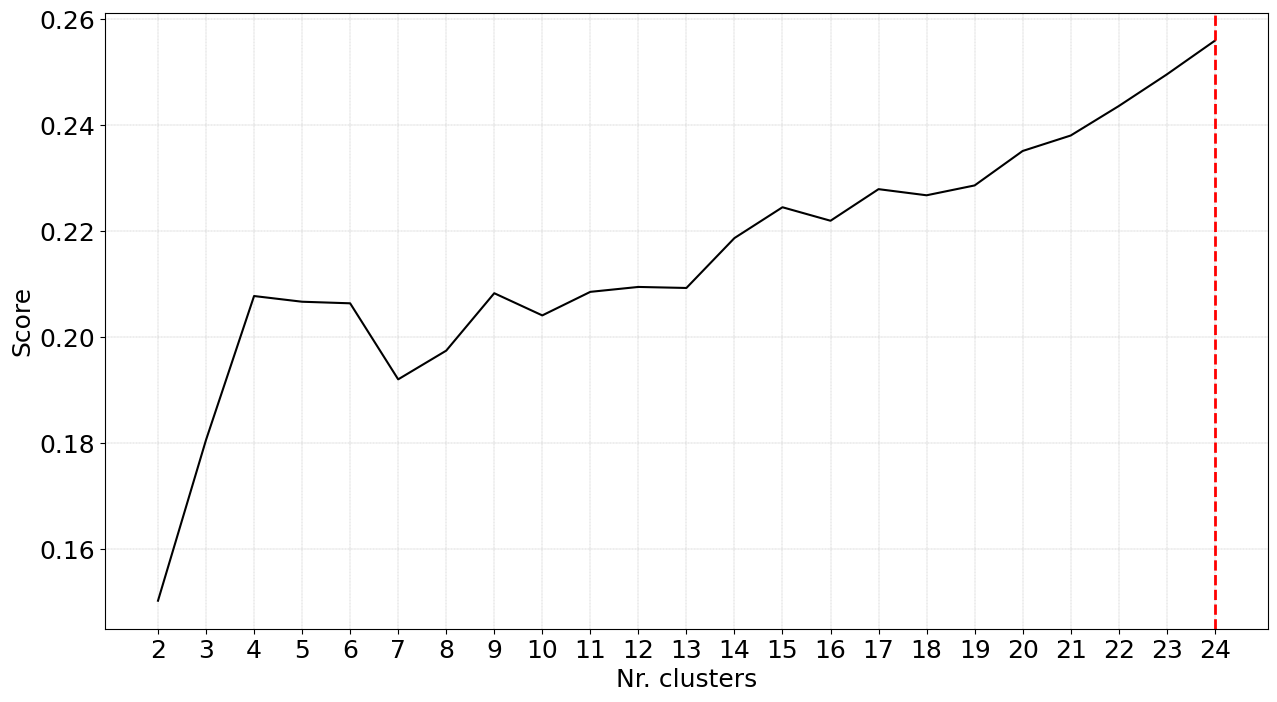

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [125]:
from clusteval import clusteval # experiment to find the best silhoutte score by adding cluster evaluation library
import numpy as np

ce = clusteval(evaluate='silhouette')  #Silhouette cluster evaluation

ce.fit(df) ## Fit the model to the data

ce.plot()  #Plot the results



Having 24 clusters wouldn't be a good choice. so i will go ahead with less clusters for evaluation

In [126]:
kmeans = KMeans(n_clusters=9, random_state=1)
KMeans_Labels=kmeans.fit_predict(df)  # Fit the model to the dataset

In [127]:
silhouette_score(df, KMeans_Labels) #score for k-means

0.22220437919506147

**K-modes**

In [128]:
! pip install kmodes


In [129]:
from kmodes.kmodes import KModes # Import library

km = KModes(n_clusters=9, n_init=5, verbose=1) # Initialize the k-modes model
clusters = km.fit_predict(df) # Fit the model to the dataset


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 834.0
Run 1, iteration: 2/100, moves: 10, cost: 831.0
Run 1, iteration: 3/100, moves: 0, cost: 831.0


In [130]:
silhouette_score(df, clusters) # score for k-mode

0.19324994892083425

**Observations**

 * Based on the observed silhouette scores, hierarchical clustering with 5 clusters (silhouette score of 0.32) appears to be the most promising clustering method compared to K-means with 9 clusters (silhouette score of 0.22) and K-mode with 9 clusters (silhouette score of 0.19). Therefore, it seems reasonable to proceed with hierarchical clustering labels for further analysis of the clusters.

In [131]:
df['Ag_Cluster_Labels'] = Ag_clusters  # adding the clusters and creating a column in data

In [132]:
df['Ag_Cluster_Labels'].value_counts() # to see the number of clusters

4    45
2    44
1    31
3    30
0    25
Name: Ag_Cluster_Labels, dtype: int64

In [133]:
df_1 = df[df['Ag_Cluster_Labels']==1] #display the data that are in agglomerative cluster-1
print (df_1)

     S1r1  S1r2  S1r3  S2r1  S2r2  S3r1  S3r2  S4r1  S4r2  S4r3  ...  Q6r2  \
0       1     0     0     1     0     1     0     0     0     0  ...     1   
1       0     0     1     1     0     1     0     0     0     0  ...     1   
17      0     1     0     1     0     1     0     0     0     0  ...     0   
20      1     0     0     1     0     1     0     1     0     0  ...     0   
21      1     0     0     1     0     1     0     0     0     0  ...     1   
26      1     0     0     1     0     1     0     0     0     0  ...     1   
33      1     0     0     1     0     1     0     0     0     0  ...     0   
37      0     1     0     1     0     1     0     0     0     0  ...     1   
40      1     0     0     1     0     1     0     0     0     0  ...     1   
58      0     0     1     1     0     1     0     0     0     0  ...     0   
62      1     0     0     1     0     1     0     0     0     0  ...     1   
63      1     0     0     1     0     1     0     0     0     0 

# Results

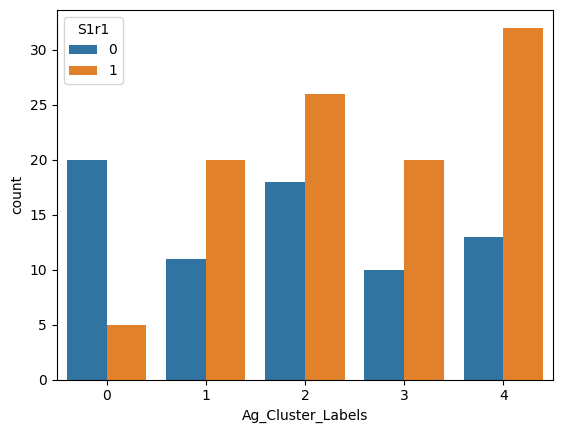

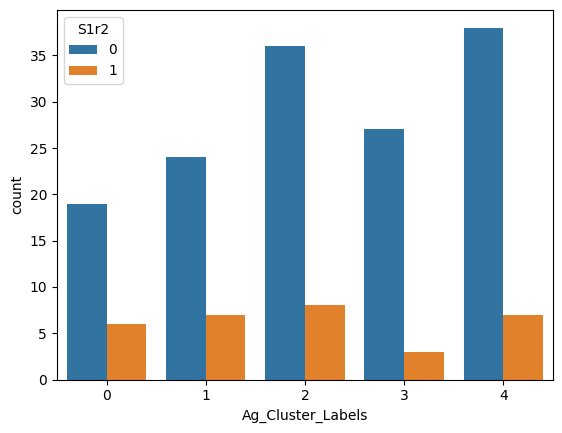

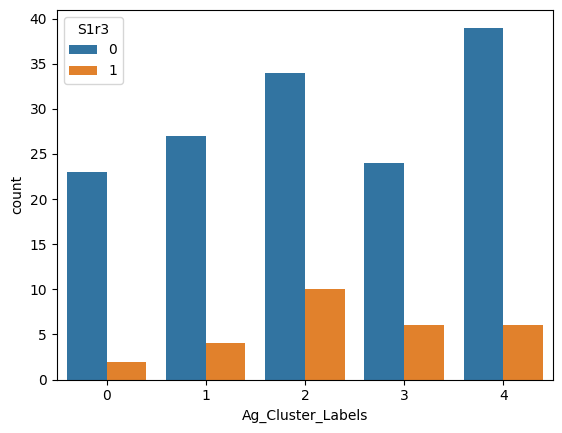

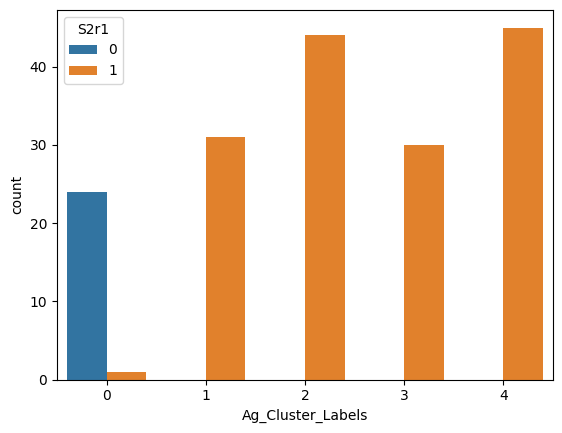

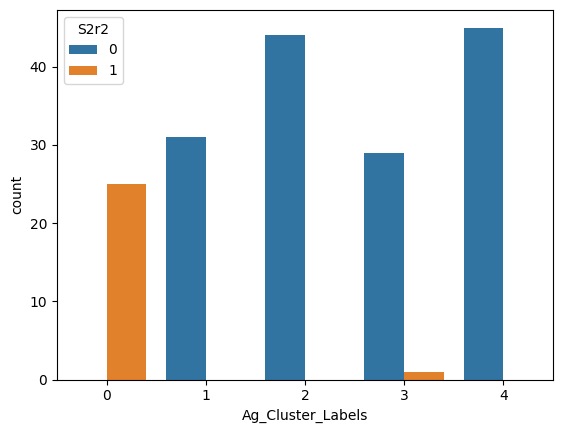

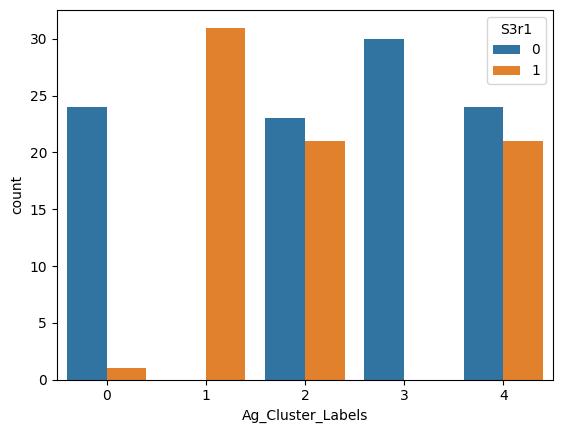

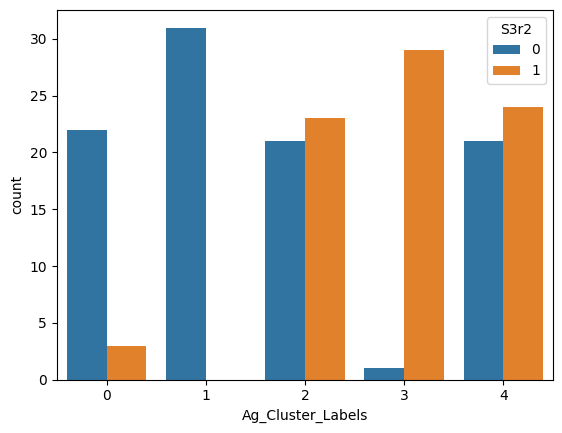

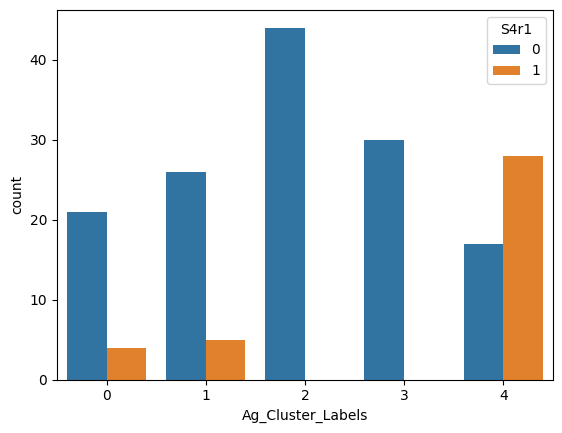

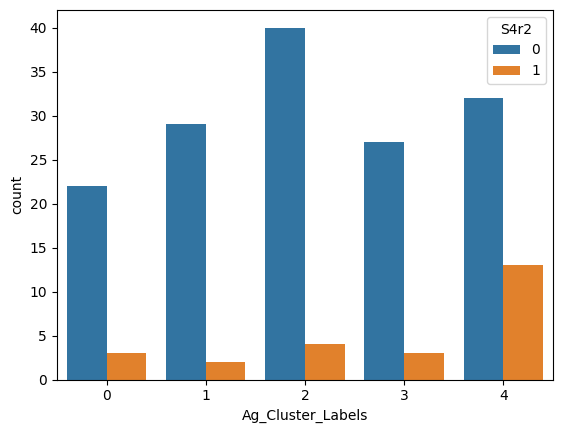

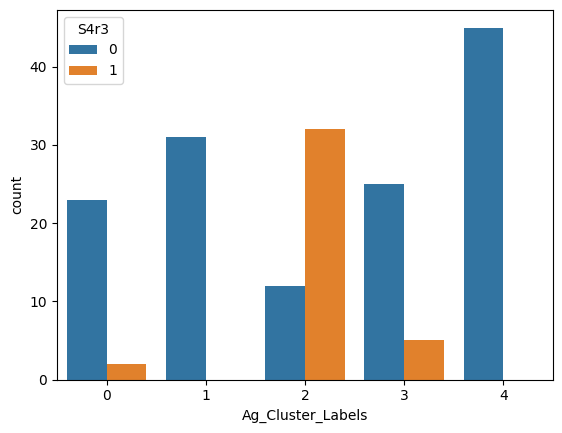

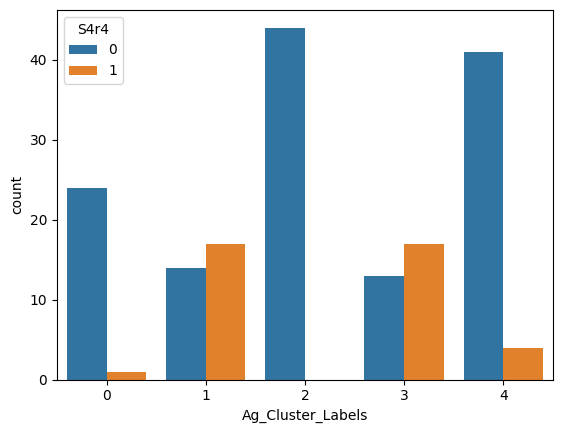

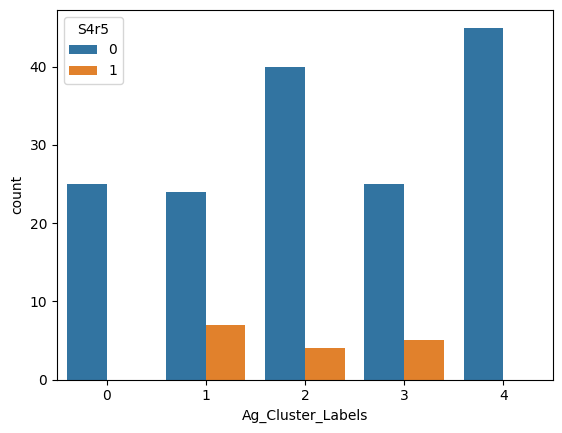

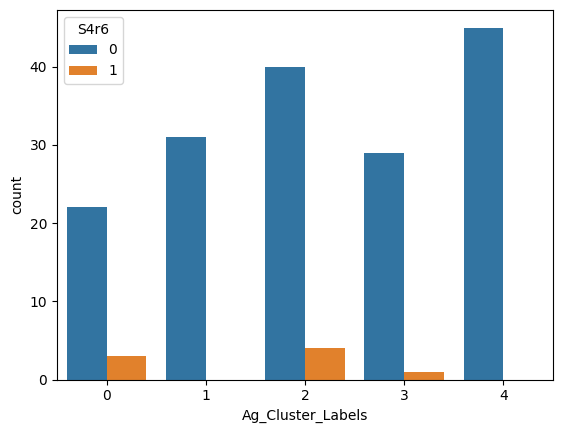

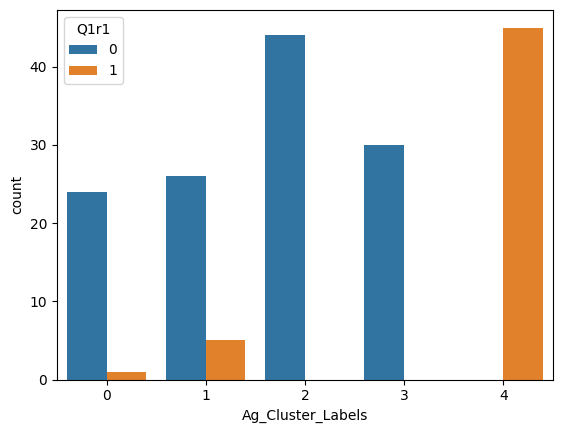

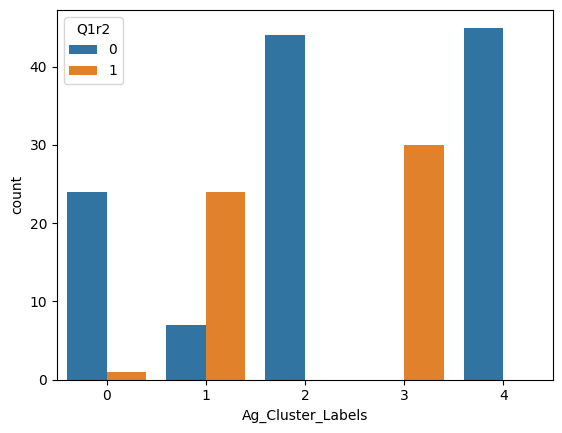

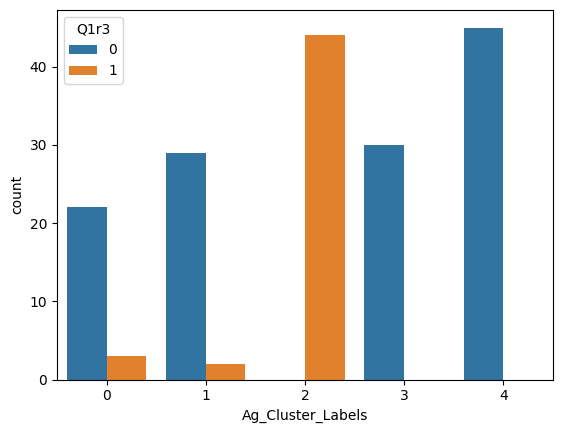

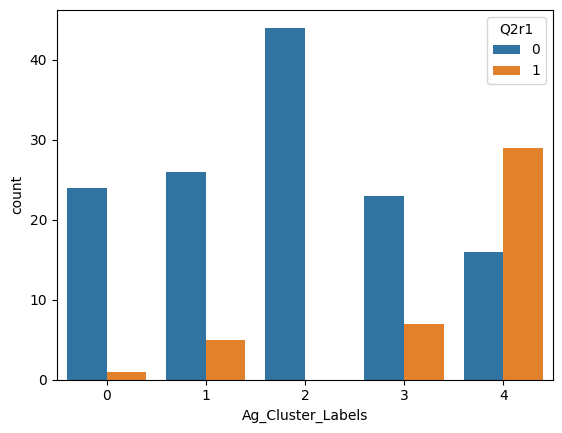

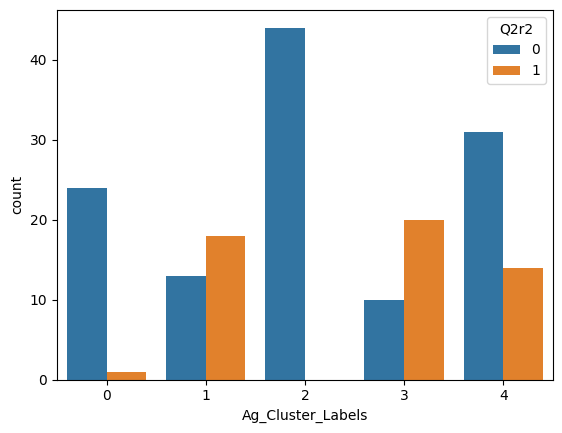

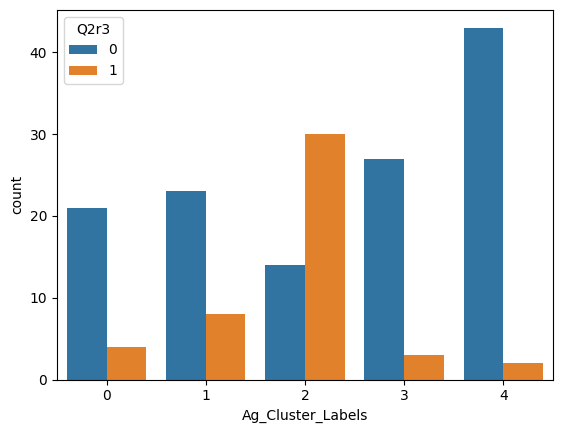

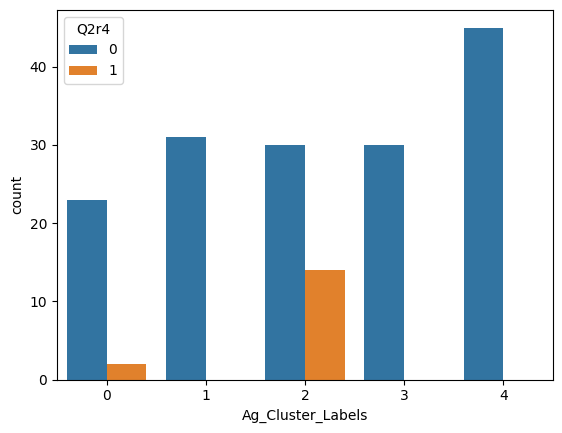

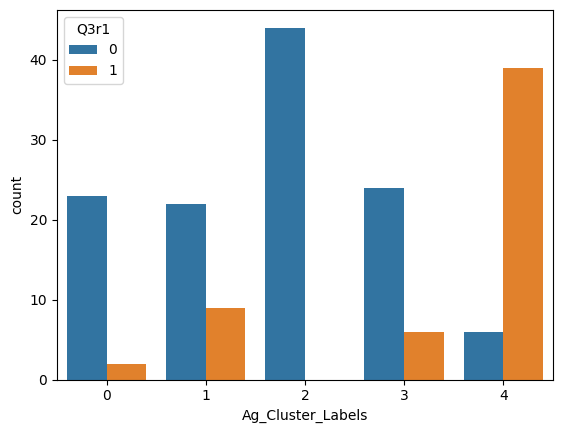

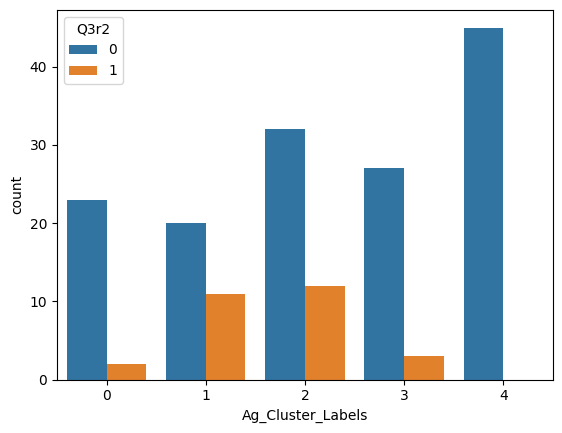

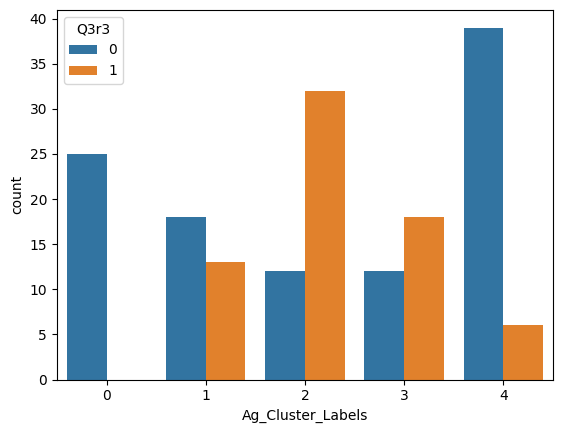

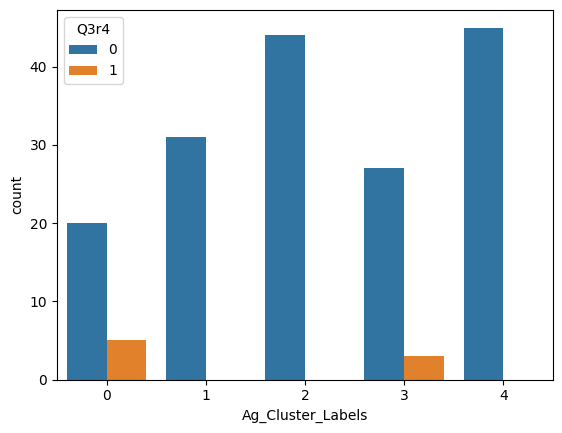

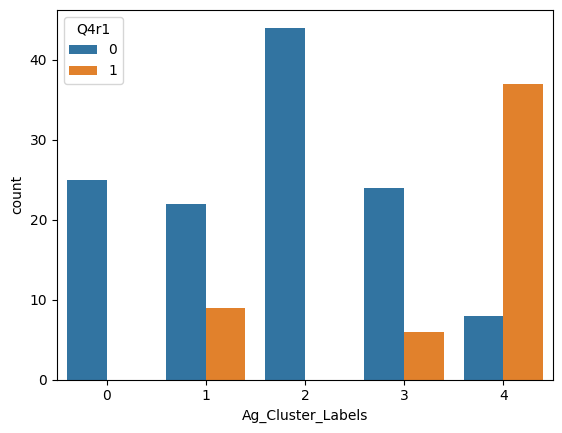

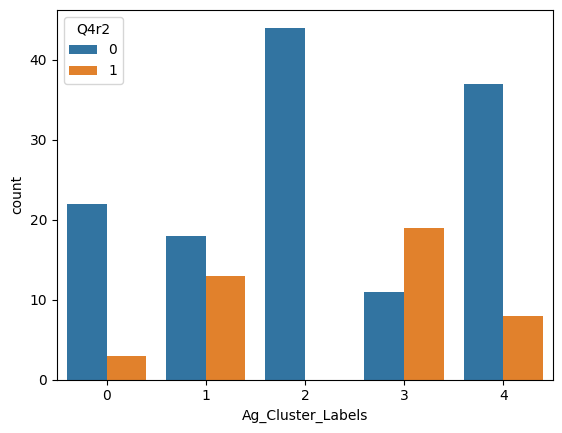

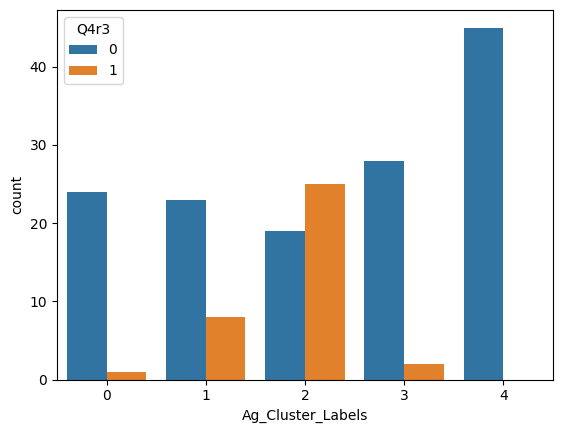

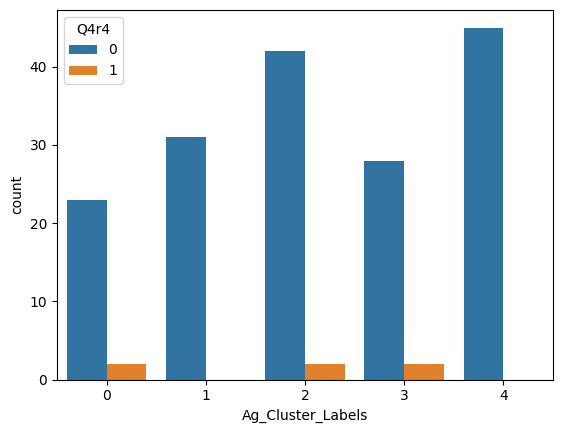

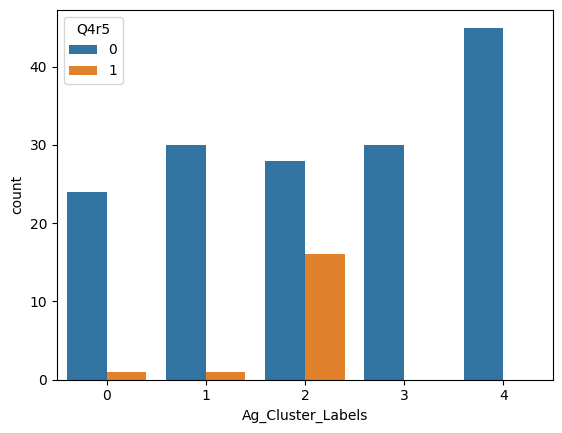

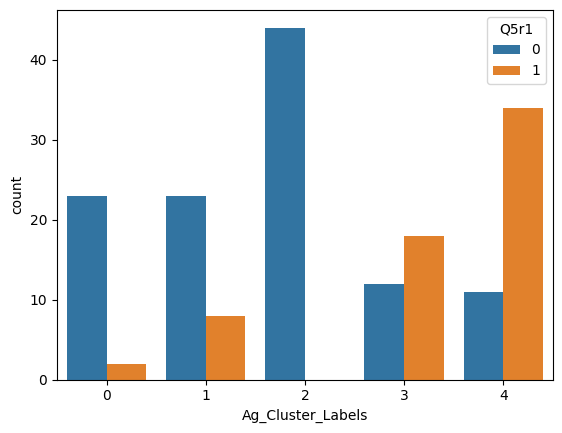

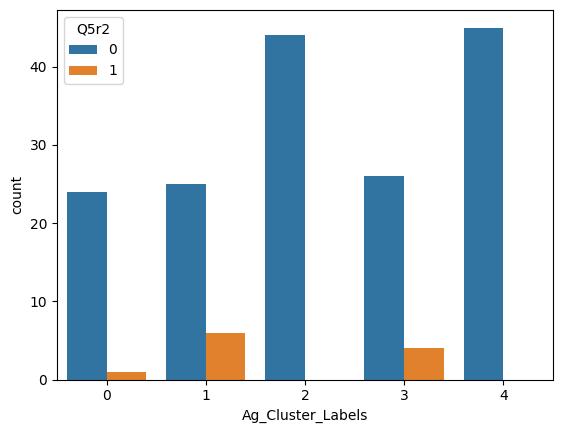

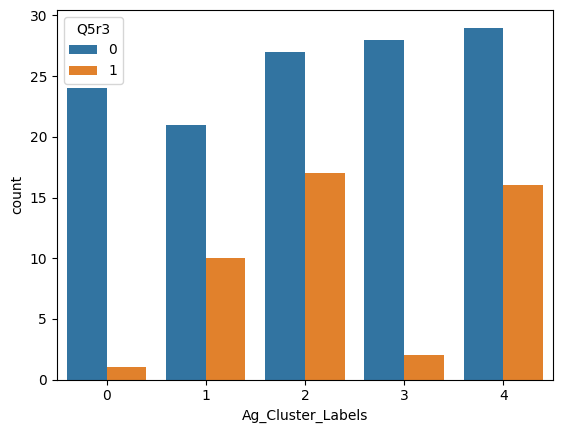

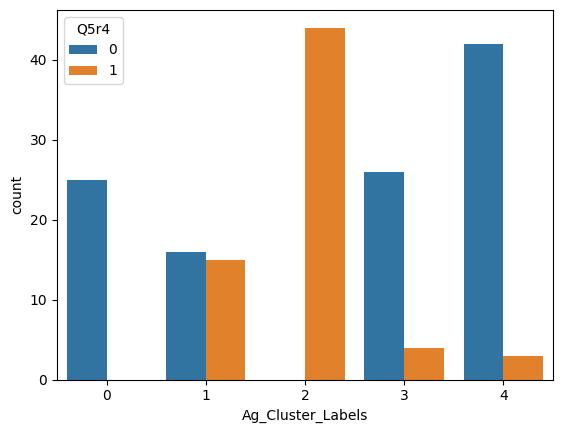

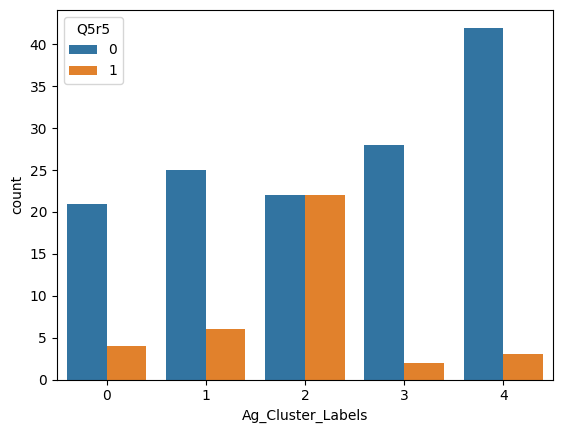

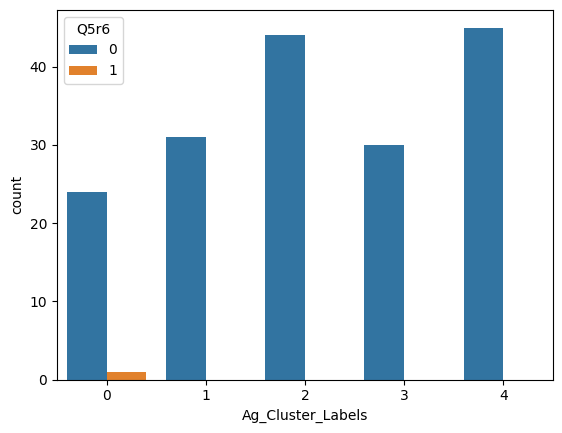

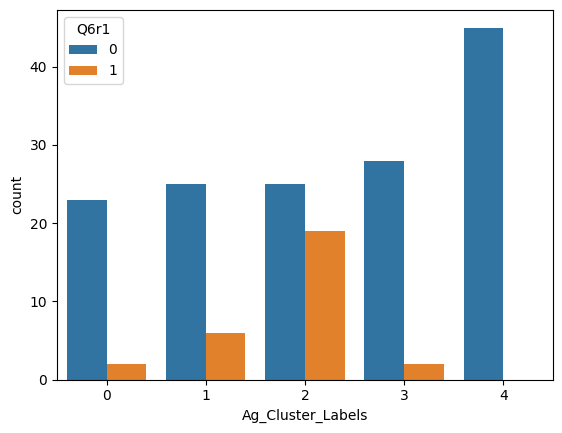

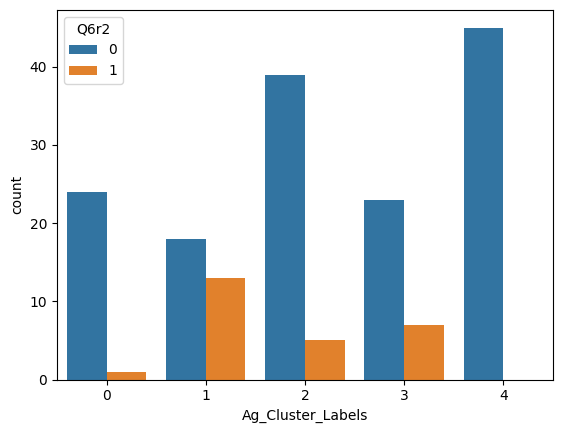

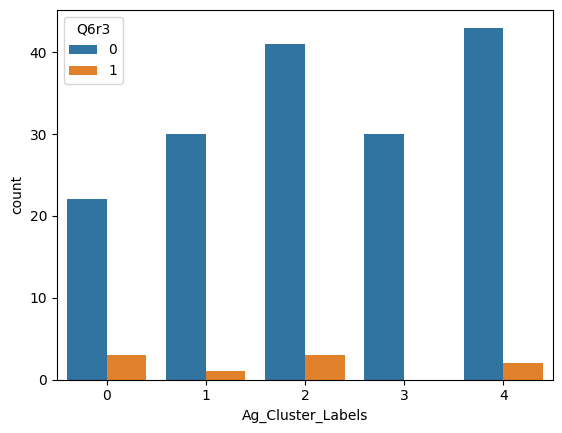

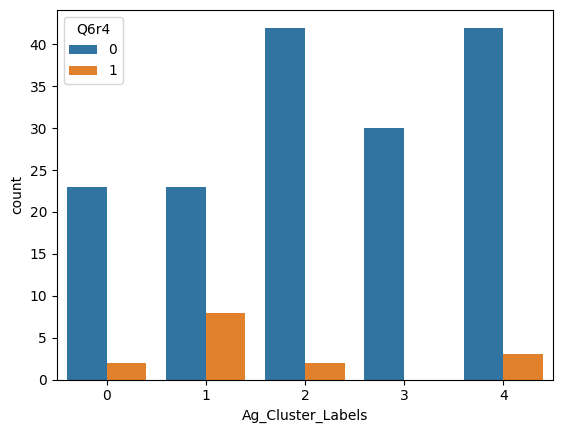

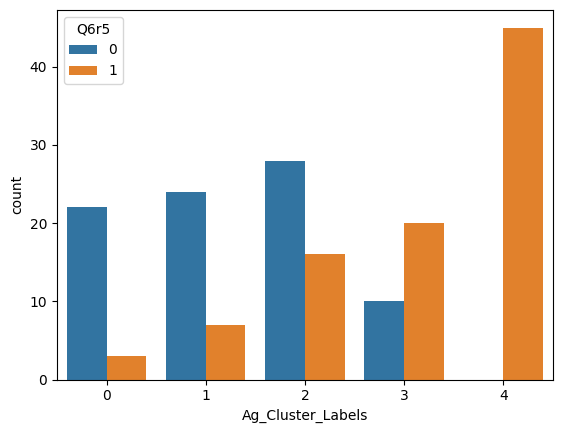

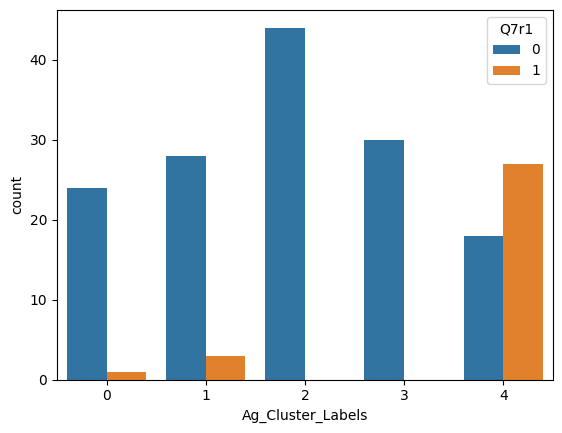

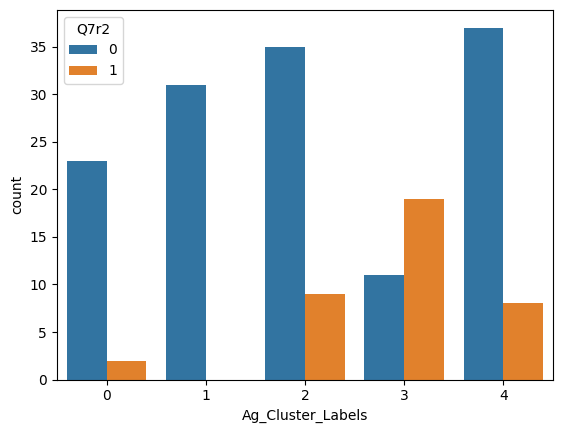

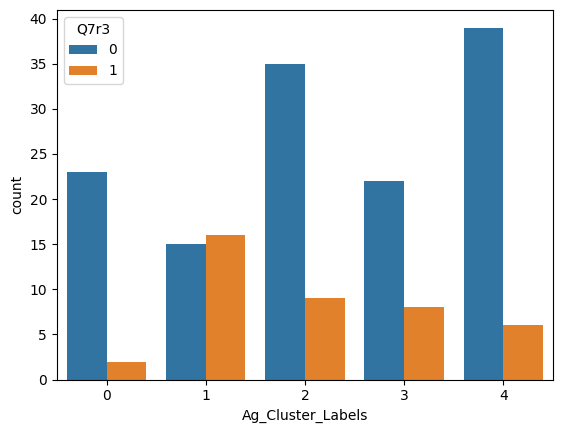

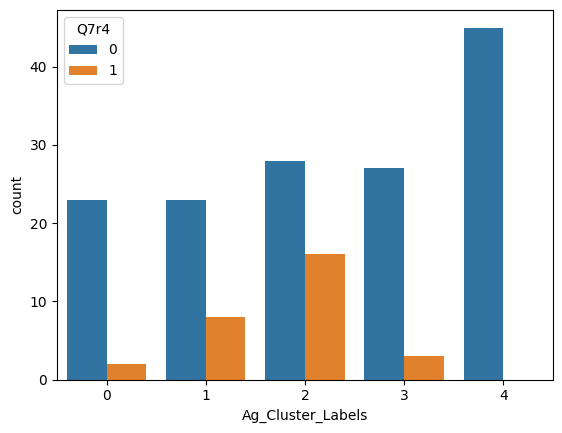

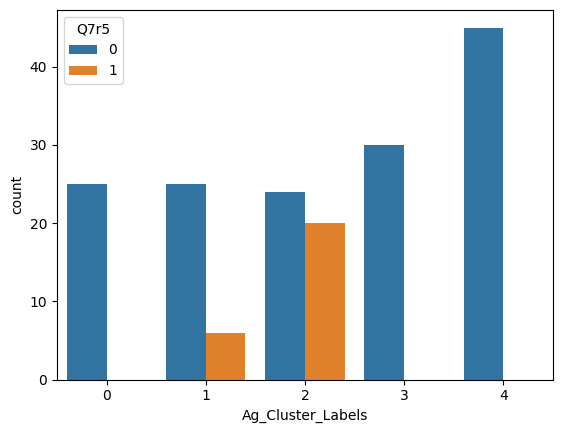

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_visualise = ['S1r1', 'S1r2', 'S1r3', 'S2r1', 'S2r2', 'S3r1', 'S3r2', 'S4r1', 'S4r2','S4r3', 'S4r4', 'S4r5', 'S4r6', 'Q1r1', 'Q1r2', 'Q1r3', 'Q2r1', 'Q2r2','Q2r3', 'Q2r4', 'Q3r1', 'Q3r2', 'Q3r3', 'Q3r4', 'Q4r1', 'Q4r2', 'Q4r3','Q4r4', 'Q4r5', 'Q5r1', 'Q5r2', 'Q5r3', 'Q5r4', 'Q5r5', 'Q5r6', 'Q6r1','Q6r2', 'Q6r3', 'Q6r4', 'Q6r5', 'Q7r1', 'Q7r2', 'Q7r3', 'Q7r4', 'Q7r5']
# the above columns will be displayed in the countplot with x axis as the cluster number
for col in cols_visualise:
    sns.countplot(x='Ag_Cluster_Labels', hue=col, data=df)
    plt.show()


**Observations for each question** -

*  S1: Identifying the respondents' country of origin:

1.  Cluster 4 predominantly consists of respondents from the United States.
2.  Respondents from the United Kingdom are distributed across clusters 2 and 3.
3.  People from Japan primarily belong to cluster 2.

*   S2: verication status

1.   Clusters 1, 2, 3, and 4 predominantly consist of individuals with valid verification status.
2.   Cluster 0, on the other hand, contains individuals with invalid verification status.


*   S3 : Participant gender

1. Cluster 1 predominantly consists of males, with a slightly lower number in clusters 2 and 4.
2. Cluster 3 is mainly composed of females, with a reduced count in cluster 2, and none present in cluster 1.

*  S4: Age Distribution of Participants

1. Cluster 4 predominantly includes individuals under 18 years old.
2. Cluster 4 also encompasses participants aged 18-24.
3. Participants aged 25-34 are mainly found in Cluster 2.
4. Clusters 1 and 3 primarily consist of those in the 35-44 age bracket.
5. Individuals aged 45-54 are mostly in Clusters 1 and 3.
6. Cluster 0 is characterized by participants aged 55 and above.



* Q1: Frequency of Running

1. Individuals who run occasionally, favoring nice weather, are primarily in Cluster 4.
2. Those who run consistently, about 3-4 times a week, are found in Clusters 3 and 1.
3. Participants who typically run 5 or more times a week are grouped in Cluster 2.



* Q2: Number of Running Shoes Owned for Training

1. Individuals who have a single pair of shoes for running and other activities are mainly in Cluster 4.
2. Those with one dedicated pair of running shoes are primarily in Clusters 2 and 3.
3. Participants with 3 or more pairs of running shoes, some for training and others for racing, are mostly in Cluster 2, with a smaller number in Cluster 1.
4. Individuals owning 5 or more pairs of running shoes, selected based on the type of training and racing, are largely in Cluster 2, with fewer in Cluster 0.


* Q3: Cushioning Type in Most-Used Training Shoes

1. Participants who are unsure about the cushioning type in their training shoes are predominantly in Cluster 4.
2. Foam cushioning is primarily used by those in Clusters 1 and 2.
3. Rubber cushioning is more common in Cluster 2 than in Cluster 3.
4. A blend of foam and rubber cushioning is found in shoes used by individuals in Cluster 0.

* Q4: Plating Type in Racing Shoes

1. Individuals who do not participate in races are mainly in Cluster 4.
2. Those who use the same shoes for training and racing are more prevalent in Cluster 3, followed by Cluster 1.
3. Rubber plating is a common feature in the racing shoes of participants in Cluster 2.
4. Foam plating is equally distributed among Clusters 0, 2, and 3.
5. Racing shoes with a carbon plate are predominantly used by members of Cluster 2.

* Q5: Physical Activities Beyond Running

1. Yoga and Pilates are popular among individuals in Cluster 4, followed by Cluster 3.
2. Participants who engage in no physical activities other than running are predominantly in Cluster 1.
3. Spinning is a common activity in Cluster 2, with a lesser presence in Cluster 4.
4. Strength conditioning, such as weight lifting, is overwhelmingly popular in Cluster 2.
5. Swimming is another activity favored by members of Cluster 2.
6. Hiking is primarily an activity for those in Cluster 0.


* Q6: Feedback on Current Running Shoes

1. Participants expressing no complaints about their running shoes are mainly in Cluster 2.
2. Those who feel their shoes wear out too quickly, necessitating frequent replacements, are primarily in Cluster 2, with a significant number also in Cluster 3.
3. The issue of shoes feeling too narrow is equally reported by members of Clusters 0 and 2.
4. The complaint about shoes being too heavy is predominantly from individuals in Cluster 1.
5. Concerns about the shoes not being fashionable are predominantly voiced by individuals in Cluster 4.

* Q7: Preferred Colors for Running Shoes

1. Preferences for bright and bold colors are mainly found in Cluster 4.
2. Soft pastels like pink, coral, and purple are favored by participants in Cluster 3.
3. Earth tones, including greens, yellows, and browns, are popular in Cluster 1.
4. Neutral colors, such as black and white, are primarily chosen by those in Cluster 2.
5. A general lack of strong color preference, or a choice for 'normal' colors, is also observed in Cluster 2.


















# Interpret Results


**Product Ideas:**
1. **For Younger Runners in Cluster 4 (mostly from the US)**: Make shoes that are really colorful and stylish because they seem to care a lot about fashion.
2. **Durability for Clusters 2 and 3**: These runners seem to use their shoes a lot and are worried they wear out too quickly. Maybe make shoes that last longer for them.
3. **Comfort for Cluster 0 and 2**: Some people find the shoes too narrow. It might be a good idea to have wider options.
4. **Light Shoes for Cluster 1**: They think the shoes are too heavy, so maybe lighter shoes would be better.

**Marketing Ideas:**
1. **Ads for Different Ages**: Use cool, trendy ads for younger people in the US (Cluster 4) and more serious, performance-focused ads for the 25-34 age group in Cluster 2.
2. **Focus on Activities**: Marketing multi-sport athletic footwear for Cluster 2, who are enthusiastic about running, spinning, and swimming, and target yoga and Pilates-compatible shoes for Cluster 4
3. **Special Offers**: For people who buy shoes often (like in Cluster 2), maybe offer discounts, loyalty program or other perks to keep them coming back.

**Personalizing the Approach:**
1. **Custom Shoes**: Let people in Cluster 4 design their own shoes since they like them to be fashionable. This could be really cool for them.
2. **Feedback and Improvements**: Keep asking people what they think about the shoes, especially those who worry about durability (Cluster 2) and comfort (Cluster 0 and 2) also provide shoe care and maintenance content, especially for Clusters 2 and 3, who are concerned about shoe longevity.
3. **Rewards for Regular Buyers**: Give people who buy a lot of shoes (like in Cluster 2) some perks or points to make them feel special.


In summary, if the company focuses on understanding the unique preferences and requirements of each group, they can create more suitable shoes and targeted advertisements. Additionally, valuing customer feedback and making them feel appreciated is always beneficial.